In [429]:
#import csv files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV-Datei einlesen
df_con = pd.read_csv("constituencies_2025.csv", sep=";", on_bad_lines='skip', engine='python')
df_dem = pd.read_csv("Speaker_demographics.csv", sep=";", on_bad_lines='skip', engine='python')
df_chu = pd.read_csv("chunks.csv", sep=",", on_bad_lines='skip', engine='python')
df_spe = pd.read_csv("speeches.csv", sep=",", on_bad_lines='skip', engine='python')

# Ersten Zeilen anzeigen
df_chu.head()



,chunk_id,speech_id,debate_id,speaker_name,speaker_party,debate_title,debate_date,chunk_text,chunk_index,total_chunks,word_count,char_count,chunking_method,assigned_user,frame_label,annotation_confidence,annotation_notes,created_at,updated_at,classification_timestamp
0,chunk_220102,uk.org.publicwhip/debate/2019-03-13b.364.6,uk.org.publicwhip/debate/2019-03-13b.345.0,Chris Leslie,NaN,SPRING STATEMENT,2019-03-13,It is a fundamental mistake for the Chancellor...,0,1,96,565,semantic,NaN,economic,NaN,NaN,2025-10-13 11:05:52.85417,2025-10-13 11:05:52.85417,2025-11-02 23:26:03.503761
1,chunk_270431,uk.org.publicwhip/debate/2019-12-20a.146.6,uk.org.publicwhip/debate/2019-12-20a.146.0,Jonathan Edwards,NaN,European Union (Withdrawal Agreement) Bill,2019-12-20,The Bill contains provisions not to extend the...,0,1,40,236,semantic,NaN,powerlessness,NaN,NaN,2025-10-13 11:05:56.513287,2025-10-13 11:05:56.513287,2025-11-02 23:26:03.513426
2,chunk_231421,uk.org.publicwhip/debate/2019-04-09c.213.0,uk.org.publicwhip/debate/2019-04-09c.205.0,Alan Duncan,NaN,EXITING THE EUROPEAN UNION (SANCTIONS),2019-04-09,I think the right hon. Lady may have misunders...,0,1,215,1197,semantic,NaN,none,NaN,NaN,2025-10-13 11:05:55.054923,2025-10-13 11:05:55.054923,2025-11-02 23:26:03.516645
3,chunk_190859,uk.org.publicwhip/debate/2019-01-14b.834.2,uk.org.publicwhip/debate/2019-01-14b.823.3,Theresa May,NaN,LEAVING THE EU,2019-01-14,"Of course, the House will give its view tomorr...",0,1,109,593,semantic,NaN,economic,NaN,NaN,2025-10-13 11:05:52.342023,2025-10-13 11:05:52.342023,2025-11-02 23:26:03.520324
4,chunk_101471,uk.org.publicwhip/debate/2017-11-20b.800.1,uk.org.publicwhip/debate/2017-11-20b.758.0,Anna Soubry,NaN,DUTIES OF CUSTOMS,2017-11-20,I am not going to repeat the excellent argumen...,2,5,122,664,semantic,NaN,conflict,NaN,NaN,2025-10-13 11:05:43.267617,2025-10-13 11:05:43.267617,2025-11-02 23:26:03.523197


In [430]:
print("Rows in df_con:", len(df_con))
print("Rows in df_dem:", len(df_dem))
print("Rows in df_chu:", len(df_chu))
print("Rows in df_spe:", len(df_spe))


Rows in df_con: 650
Rows in df_dem: 1124
Rows in df_chu: 62847
Rows in df_spe: 32087


In [431]:
# Remove blank or missing twfy_id before merging
df_dem = df_dem[df_dem['twfy_id'].notna()]

# Remove blank or missing twfy_id before merging
df_spe = df_spe[df_spe['twfy_id'].notna()]

In [432]:
print("Rows in df_con:", len(df_con))
print("Rows in df_dem:", len(df_dem))
print("Rows in df_chu:", len(df_chu))
print("Rows in df_spe:", len(df_spe))

Rows in df_con: 650
Rows in df_dem: 1094
Rows in df_chu: 62847
Rows in df_spe: 31560


In [433]:
# Merge Speaker demographics and constituencies
# Select only the columns you need from df_con
const_cols = [
    'constituency',   # key to match
    'nation',
    'region',
    'area',
    'density',
    'center_lat',
    'center_lon'
]

# Merge speaker demographics with constituency info
df_dem = df_dem.merge(
    df_con[const_cols],
    left_on='Constituency',   # column in speaker dataframe
    right_on='constituency',  # column in constituencies dataframe
    how='left'                # keep all speakers, even if no constituency match
)

# Quick check
df_dem.head()


,twfy_id,First name,Last name,Party,Constituency,person_id,brexit_vote,Fullname,Gender,HouseStartYear,HouseEndYear,Birthdate,constituency,nation,region,area,density,center_lat,center_lon
0,10900.0,Hywel,Francis,Labour,Aberafan Maesteg,uk.org.publicwhip/member/10900,NaN,Hywel Francis,M,2001.0,2015.0,06/06/1946,Aberafan Maesteg,Wales,Wales,"249,5081731","279,818489","51,60820598","-3,701807387"
1,25297.0,Stephen,Kinnock,Labour,Aberafan Maesteg,uk.org.publicwhip/member/25297,remain,Stephen Kinnock,M,2015.0,NaN,01/01/1970,Aberafan Maesteg,Wales,Wales,"249,5081731","279,818489","51,60820598","-3,701807387"
2,10174.0,Frank,Doran,Labour,Aberdeen North,uk.org.publicwhip/member/10174,NaN,Frank Doran,M,1997.0,2015.0,13/04/1949,Aberdeen North,Scotland,Scotland,"103,5741812","742,4147518","57,18740967","-2,175601003"
3,25314.0,Kirsty,Blackman,Scottish National Party,Aberdeen North,uk.org.publicwhip/member/25314,NaN,Kirsty Blackman,F,2015.0,NaN,20/03/1986,Aberdeen North,Scotland,Scotland,"103,5741812","742,4147518","57,18740967","-2,175601003"
4,10032.0,Anne,Begg,Labour,Aberdeen South,uk.org.publicwhip/member/10032,NaN,Anne Begg,F,1997.0,2015.0,06/12/1955,Aberdeen South,Scotland,Scotland,"102,0155705","750,4736739","57,12365351","-2,171649568"


In [434]:
# Merge twfy_id from speech df to chunk df
df_chu = df_chu.merge(
    df_spe[['speech_id', 'twfy_id']],
    on='speech_id',
    how='left',
)
# Quick check
df_chu.head()

,chunk_id,speech_id,debate_id,speaker_name,speaker_party,debate_title,debate_date,chunk_text,chunk_index,total_chunks,...,char_count,chunking_method,assigned_user,frame_label,annotation_confidence,annotation_notes,created_at,updated_at,classification_timestamp,twfy_id
0,chunk_220102,uk.org.publicwhip/debate/2019-03-13b.364.6,uk.org.publicwhip/debate/2019-03-13b.345.0,Chris Leslie,NaN,SPRING STATEMENT,2019-03-13,It is a fundamental mistake for the Chancellor...,0,1,...,565,semantic,NaN,economic,NaN,NaN,2025-10-13 11:05:52.85417,2025-10-13 11:05:52.85417,2025-11-02 23:26:03.503761,10354
1,chunk_270431,uk.org.publicwhip/debate/2019-12-20a.146.6,uk.org.publicwhip/debate/2019-12-20a.146.0,Jonathan Edwards,NaN,European Union (Withdrawal Agreement) Bill,2019-12-20,The Bill contains provisions not to extend the...,0,1,...,236,semantic,NaN,powerlessness,NaN,NaN,2025-10-13 11:05:56.513287,2025-10-13 11:05:56.513287,2025-11-02 23:26:03.513426,24743
2,chunk_231421,uk.org.publicwhip/debate/2019-04-09c.213.0,uk.org.publicwhip/debate/2019-04-09c.205.0,Alan Duncan,NaN,EXITING THE EUROPEAN UNION (SANCTIONS),2019-04-09,I think the right hon. Lady may have misunders...,0,1,...,1197,semantic,NaN,none,NaN,NaN,2025-10-13 11:05:55.054923,2025-10-13 11:05:55.054923,2025-11-02 23:26:03.516645,10179
3,chunk_190859,uk.org.publicwhip/debate/2019-01-14b.834.2,uk.org.publicwhip/debate/2019-01-14b.823.3,Theresa May,NaN,LEAVING THE EU,2019-01-14,"Of course, the House will give its view tomorr...",0,1,...,593,semantic,NaN,economic,NaN,NaN,2025-10-13 11:05:52.342023,2025-10-13 11:05:52.342023,2025-11-02 23:26:03.520324,10426
4,chunk_101471,uk.org.publicwhip/debate/2017-11-20b.800.1,uk.org.publicwhip/debate/2017-11-20b.758.0,Anna Soubry,NaN,DUTIES OF CUSTOMS,2017-11-20,I am not going to repeat the excellent argumen...,2,5,...,664,semantic,NaN,conflict,NaN,NaN,2025-10-13 11:05:43.267617,2025-10-13 11:05:43.267617,2025-11-02 23:26:03.523197,24772


In [435]:
# Remove blank or missing twfy_id before merging
df_chu = df_chu[df_chu['twfy_id'].notna()]
print("Rows in df_chu:", len(df_chu))

Rows in df_chu: 62115


In [436]:
# Merge Speaker demographics and chunks

# In beiden DataFrames anwenden
df_chu['twfy_id']  = df_chu['twfy_id'].apply(normalize_twfy)
df_dem['twfy_id']  = df_dem['twfy_id'].apply(normalize_twfy)

# Select only the columns you need from df_dem
dem_cols = [
    "twfy_id",
    "First name",
    "Last name",
    "Party",
    'Constituency',
    "brexit_vote",
    "Gender",
    "HouseStartYear",
    "HouseEndYear",
    "Birthdate",
    'nation',
    'region',
    'area',
    'density',
    'center_lat',
    'center_lon'
]

# Merge speaker demographics with chunks
df_chu = df_chu.merge(
    df_dem[dem_cols],
    left_on='twfy_id',   # column in speaker dataframe
    right_on='twfy_id',  # column in constituencies dataframe
    how='left'                # keep all speakers, even if no constituency match
)

# Quick check
df_chu.tail()


,chunk_id,speech_id,debate_id,speaker_name,speaker_party,debate_title,debate_date,chunk_text,chunk_index,total_chunks,...,Gender,HouseStartYear,HouseEndYear,Birthdate,nation,region,area,density,center_lat,center_lon
62110,chunk_320231,uk.org.publicwhip/debate/2022-12-20a.136.0,uk.org.publicwhip/debate/2022-12-20a.135.0,Peter Aldous,NaN,Annual Fisheries Negotiations with EU and Nort...,2022-12-20,My right hon. Friend highlighted the fact that...,1,3,...,M,2010.0,2024.0,26/08/1961,England,Eastern,"988,9201565","71,33032888","52,36271946","1,238507477"
62111,chunk_320233,uk.org.publicwhip/debate/2022-12-20a.139.1,uk.org.publicwhip/debate/2022-12-20a.135.0,Peter Grant,NaN,Annual Fisheries Negotiations with EU and Nort...,2022-12-20,I am surprised to hear the Minister say that h...,0,2,...,M,2015.0,2024.0,12/10/1960,Scotland,Scotland,"173,9471272","400,8919325","56,17661961","-3,19933604"
62112,chunk_320234,uk.org.publicwhip/debate/2022-12-20a.139.1,uk.org.publicwhip/debate/2022-12-20a.135.0,Peter Grant,NaN,Annual Fisheries Negotiations with EU and Nort...,2022-12-20,"Finally, I note that one big increase in quota...",1,2,...,M,2015.0,2024.0,12/10/1960,Scotland,Scotland,"173,9471272","400,8919325","56,17661961","-3,19933604"
62113,chunk_320235,uk.org.publicwhip/debate/2022-12-20a.195.0,uk.org.publicwhip/debate/2022-12-20a.175.0,Luke Evans,NaN,Christmas Adjournment,2022-12-20,I think this may be a first. If the House will...,0,2,...,M,2019.0,NaN,10/01/1983,England,East Midlands,"290,0237753","260,954468","52,61837363","-1,427094322"
62114,chunk_320236,uk.org.publicwhip/debate/2022-12-20a.195.0,uk.org.publicwhip/debate/2022-12-20a.175.0,Luke Evans,NaN,Christmas Adjournment,2022-12-20,The UK has also been successful in implementin...,1,2,...,M,2019.0,NaN,10/01/1983,England,East Midlands,"290,0237753","260,954468","52,61837363","-1,427094322"


# Gemergtes Datenset

In [437]:
# Spalten löschen
df_final = df_chu.drop(columns=['debate_title', 'chunk_index', 'word_count', 'char_count', 'chunking_method', "assigned_user","annotation_confidence", "annotation_notes", "created_at", "updated_at", "classification_timestamp", "chunk_text", "total_chunks", "speaker_name", "speaker_party", "debate_id"])

# Kontrolle: verbleibende Spalten anzeigen
df_final


,chunk_id,speech_id,debate_date,frame_label,twfy_id,First name,Last name,Party,Constituency,brexit_vote,Gender,HouseStartYear,HouseEndYear,Birthdate,nation,region,area,density,center_lat,center_lon
0,chunk_220102,uk.org.publicwhip/debate/2019-03-13b.364.6,2019-03-13,economic,10354,Chris,Leslie,Labour/Co-operative,Nottingham East,remain,M,2010.0,2019.0,28/06/1972,England,East Midlands,"21,67565073","3475,189786","52,96518888","-1,140461389"
1,chunk_270431,uk.org.publicwhip/debate/2019-12-20a.146.6,2019-12-20,powerlessness,24743,Jonathan,Edwards,Independent,Caerfyrddin,NaN,M,2010.0,2024.0,26/05/1976,Wales,Wales,"2040,77046","35,61547044","51,9306504","-4,153879821"
2,chunk_231421,uk.org.publicwhip/debate/2019-04-09c.213.0,2019-04-09,none,10179,Alan,Duncan,Conservative,Rutland and Stamford,remain,M,1992.0,2019.0,31/03/1957,England,East Midlands,"960,0572818","73,8122624","52,68449397","-0,655618247"
3,chunk_190859,uk.org.publicwhip/debate/2019-01-14b.834.2,2019-01-14,economic,10426,Theresa,May,Conservative,Maidenhead,remain,F,1997.0,2024.0,01/10/1956,England,South East,"182,3841024","402,7927819","51,48149823","-0,743676633"
4,chunk_101471,uk.org.publicwhip/debate/2017-11-20b.800.1,2017-11-20,conflict,24772,Anna,Soubry,Conservative,Broxtowe,remain,F,2010.0,2019.0,07/12/1956,England,East Midlands,"60,72615129","1193,242095","52,97003344","-1,266782234"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62110,chunk_320231,uk.org.publicwhip/debate/2022-12-20a.136.0,2022-12-20,economic,24904,Peter,Aldous,Conservative,Waveney Valley,remain,M,2010.0,2024.0,26/08/1961,England,Eastern,"988,9201565","71,33032888","52,36271946","1,238507477"
62111,chunk_320233,uk.org.publicwhip/debate/2022-12-20a.139.1,2022-12-20,economic,25273,Peter,Grant,Scottish National Party,Glenrothes and Mid Fife,NaN,M,2015.0,2024.0,12/10/1960,Scotland,Scotland,"173,9471272","400,8919325","56,17661961","-3,19933604"
62112,chunk_320234,uk.org.publicwhip/debate/2022-12-20a.139.1,2022-12-20,conflict,25273,Peter,Grant,Scottish National Party,Glenrothes and Mid Fife,NaN,M,2015.0,2024.0,12/10/1960,Scotland,Scotland,"173,9471272","400,8919325","56,17661961","-3,19933604"
62113,chunk_320235,uk.org.publicwhip/debate/2022-12-20a.195.0,2022-12-20,economic,25805,Luke,Evans,Conservative,Hinckley and Bosworth,NaN,M,2019.0,NaN,10/01/1983,England,East Midlands,"290,0237753","260,954468","52,61837363","-1,427094322"


In [438]:
# Sicherstellen, dass Datumsformate korrekt sind
df_final['Birthdate'] = pd.to_datetime(df_final['Birthdate'], errors='coerce', dayfirst=True)
df_final['debate_date'] = pd.to_datetime(df_final['debate_date'], errors='coerce', dayfirst=True)

# 1️⃣ Alter zum Zeitpunkt der Rede (in Jahren, als ganze Zahl)
df_final['age_at_speech'] = (
    (df_final['debate_date'] - df_final['Birthdate']).dt.days / 365.25
).round(0)  # zuerst runden
df_final['age_at_speech'] = df_final['age_at_speech'].astype('Int64')  # dann in Int64 konvertieren

# 2️⃣ Jahr aus debate_date extrahieren
df_final['debate_year'] = df_final['debate_date'].dt.year

# 3️⃣ Jahre im Parlament zum Zeitpunkt der Rede (ebenfalls ganze Zahl)
df_final['years_in_house_at_speech'] = (
    df_final['debate_year'] - df_final['HouseStartYear']
)
df_final.loc[df_final['years_in_house_at_speech'] < 0, 'years_in_house_at_speech'] = np.nan
df_final['years_in_house_at_speech'] = df_final['years_in_house_at_speech'].astype('Int64')

# Kontrolle: Ausgabe prüfen
df_final.head()


/var/folders/0c/59ptwnc93nscv24nvlwjhn2h0000gn/T/ipykernel_28943/2384173993.py:3: UserWarning:

Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.



,chunk_id,speech_id,debate_date,frame_label,twfy_id,First name,Last name,Party,Constituency,brexit_vote,...,Birthdate,nation,region,area,density,center_lat,center_lon,age_at_speech,debate_year,years_in_house_at_speech
0,chunk_220102,uk.org.publicwhip/debate/2019-03-13b.364.6,2019-03-13,economic,10354,Chris,Leslie,Labour/Co-operative,Nottingham East,remain,...,1972-06-28,England,East Midlands,"21,67565073","3475,189786","52,96518888","-1,140461389",47,2019,9
1,chunk_270431,uk.org.publicwhip/debate/2019-12-20a.146.6,2019-12-20,powerlessness,24743,Jonathan,Edwards,Independent,Caerfyrddin,NaN,...,1976-05-26,Wales,Wales,"2040,77046","35,61547044","51,9306504","-4,153879821",44,2019,9
2,chunk_231421,uk.org.publicwhip/debate/2019-04-09c.213.0,2019-04-09,none,10179,Alan,Duncan,Conservative,Rutland and Stamford,remain,...,1957-03-31,England,East Midlands,"960,0572818","73,8122624","52,68449397","-0,655618247",62,2019,27
3,chunk_190859,uk.org.publicwhip/debate/2019-01-14b.834.2,2019-01-14,economic,10426,Theresa,May,Conservative,Maidenhead,remain,...,1956-10-01,England,South East,"182,3841024","402,7927819","51,48149823","-0,743676633",62,2019,22
4,chunk_101471,uk.org.publicwhip/debate/2017-11-20b.800.1,2017-11-20,conflict,24772,Anna,Soubry,Conservative,Broxtowe,remain,...,1956-12-07,England,East Midlands,"60,72615129","1193,242095","52,97003344","-1,266782234",61,2017,7


# Gender Analysis

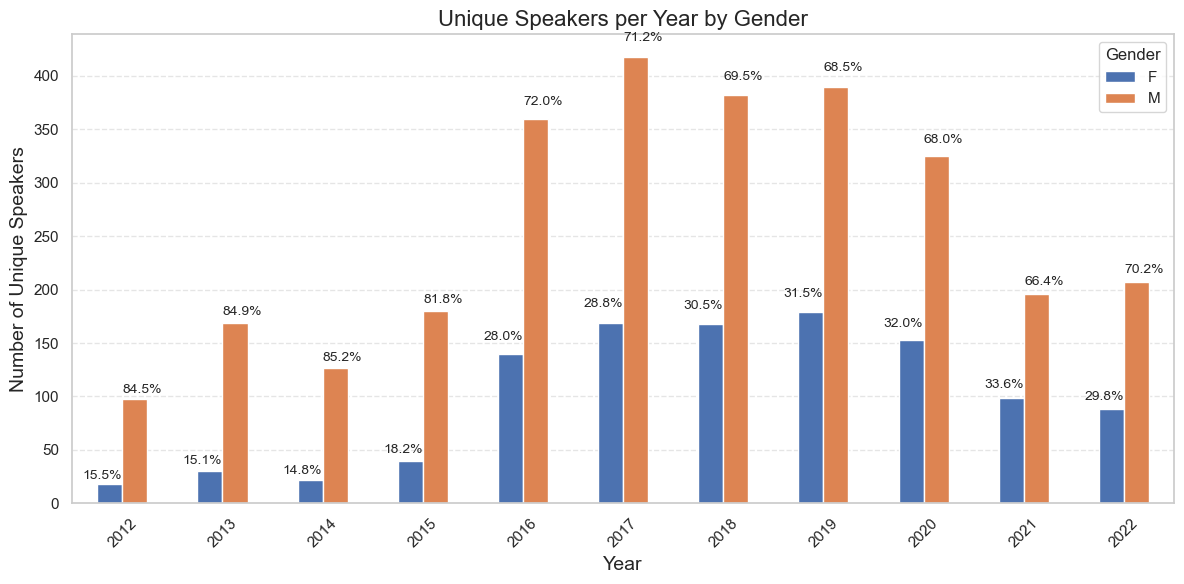

In [439]:
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 1) Compute unique speakers per year & gender ----------
df_gender = df_final.copy()

df_gender = df_gender.dropna(subset=['twfy_id', 'Gender', 'debate_year'])

unique_speakers_per_year = (
    df_gender
    .groupby(['debate_year', 'Gender'])['twfy_id']
    .nunique()
    .reset_index(name='unique_speakers')
)

# ---------- 2) Pivot to wide format ----------
pivot = unique_speakers_per_year.pivot(
    index='debate_year',
    columns='Gender',
    values='unique_speakers'
).fillna(0)

# also compute percentages
pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100

# ---------- 3) Plot ----------
ax = pivot.plot(
    kind='bar',
    figsize=(12, 6),
    rot=45
)

ax.set_title("Unique Speakers per Year by Gender", fontsize=16)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Number of Unique Speakers", fontsize=14)
ax.legend(title="Gender")

# ---------- REMOVE VERTICAL GRID LINES ----------
ax.grid(axis='x', visible=False)     # hide vertical grid lines
ax.grid(axis='y', linestyle='--', alpha=0.5)  # keep horizontal grid lines

# ---------- 4) Add percentage labels ----------
for i, year in enumerate(pivot.index):
    total = pivot.loc[year].sum()
    
    for j, gender in enumerate(pivot.columns):
        value = pivot.loc[year, gender]
        pct = pivot_percent.loc[year, gender]

        # get bar position
        bar_x = i + (j - 0.5) * 0.4  # tweak offset for grouped bars
        bar_y = value

        # annotate percentage
        ax.text(
            bar_x,
            bar_y + total * 0.02,     # slight offset above the bar
            f"{pct:.1f}%",
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.tight_layout()
plt.show()


Top 5 parties: ['Conservative', 'Labour', 'Scottish National Party', 'Labour/Co-operative', 'Liberal Democrat']


<Figure size 1200x600 with 0 Axes>

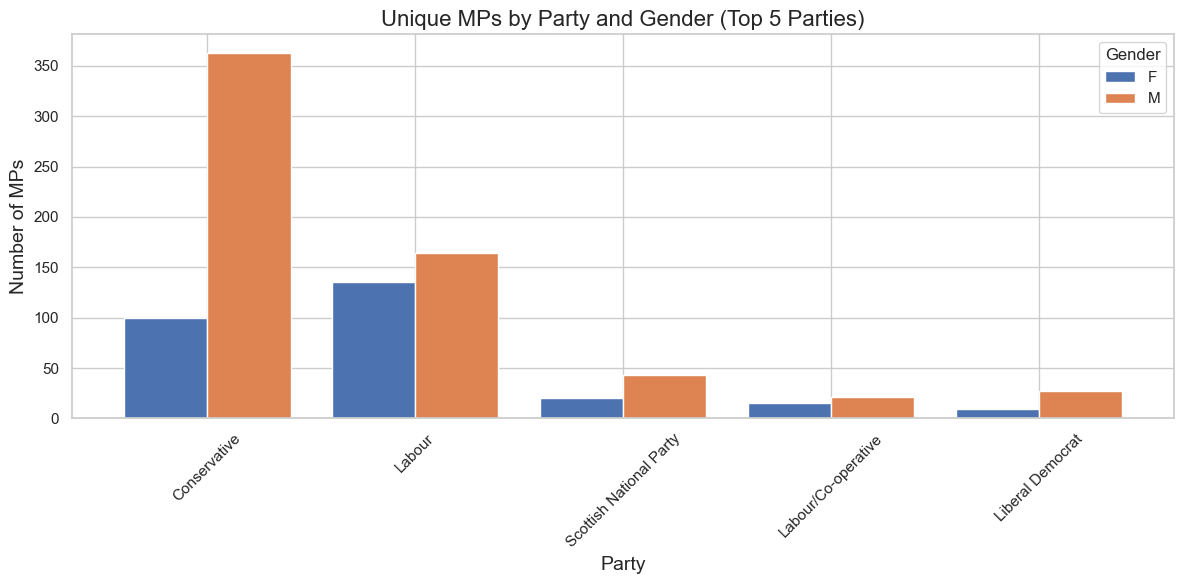

<Figure size 1200x600 with 0 Axes>

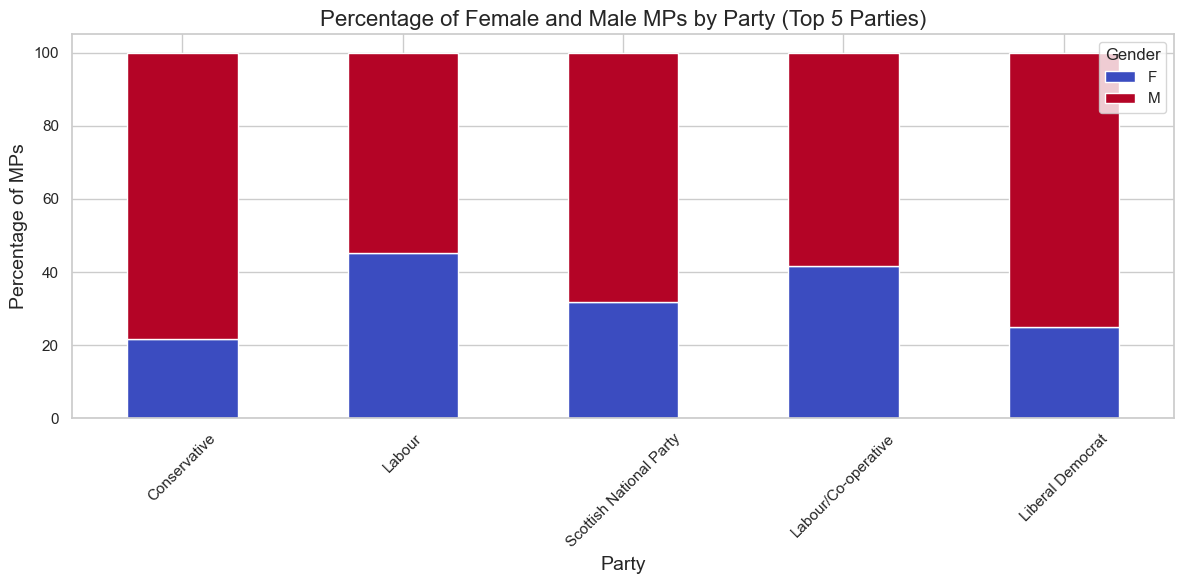

In [440]:
# Use only rows with valid Party, Gender, and unique MP identifier
df_party = df_final.dropna(subset=['Party', 'Gender', 'twfy_id'])

# Count unique MPs per party
party_sizes = (
    df_party.groupby('Party')['twfy_id']
    .nunique()
    .sort_values(ascending=False)
)

# Select the five largest parties
top5_parties = party_sizes.head(5).index.tolist()
print("Top 5 parties:", top5_parties)

# Filter dataset for these parties only
df_top5 = df_party[df_party['Party'].isin(top5_parties)]

party_gender = (
    df_top5.groupby(['Party', 'Gender'])['twfy_id']
    .nunique()
    .reset_index(name='unique_mps')
)

party_gender_pivot = party_gender.pivot(
    index='Party', columns='Gender', values='unique_mps'
).fillna(0)

# Ensure consistent party order by size
party_gender_pivot = party_gender_pivot.loc[top5_parties]

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

party_gender_pivot.plot(
    kind='bar',
    figsize=(12,6),
    color=['#4C72B0', '#DD8452'],
    rot=45,
    width=0.8
)

plt.title("Unique MPs by Party and Gender (Top 5 Parties)", fontsize=16)
plt.xlabel("Party", fontsize=14)
plt.ylabel("Number of MPs", fontsize=14)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

party_gender_percent = (
    party_gender_pivot.div(party_gender_pivot.sum(axis=1), axis=0) * 100
)

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

party_gender_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    rot=45,
    colormap="coolwarm"
)

plt.title("Percentage of Female and Male MPs by Party (Top 5 Parties)", fontsize=16)
plt.xlabel("Party", fontsize=14)
plt.ylabel("Percentage of MPs", fontsize=14)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()



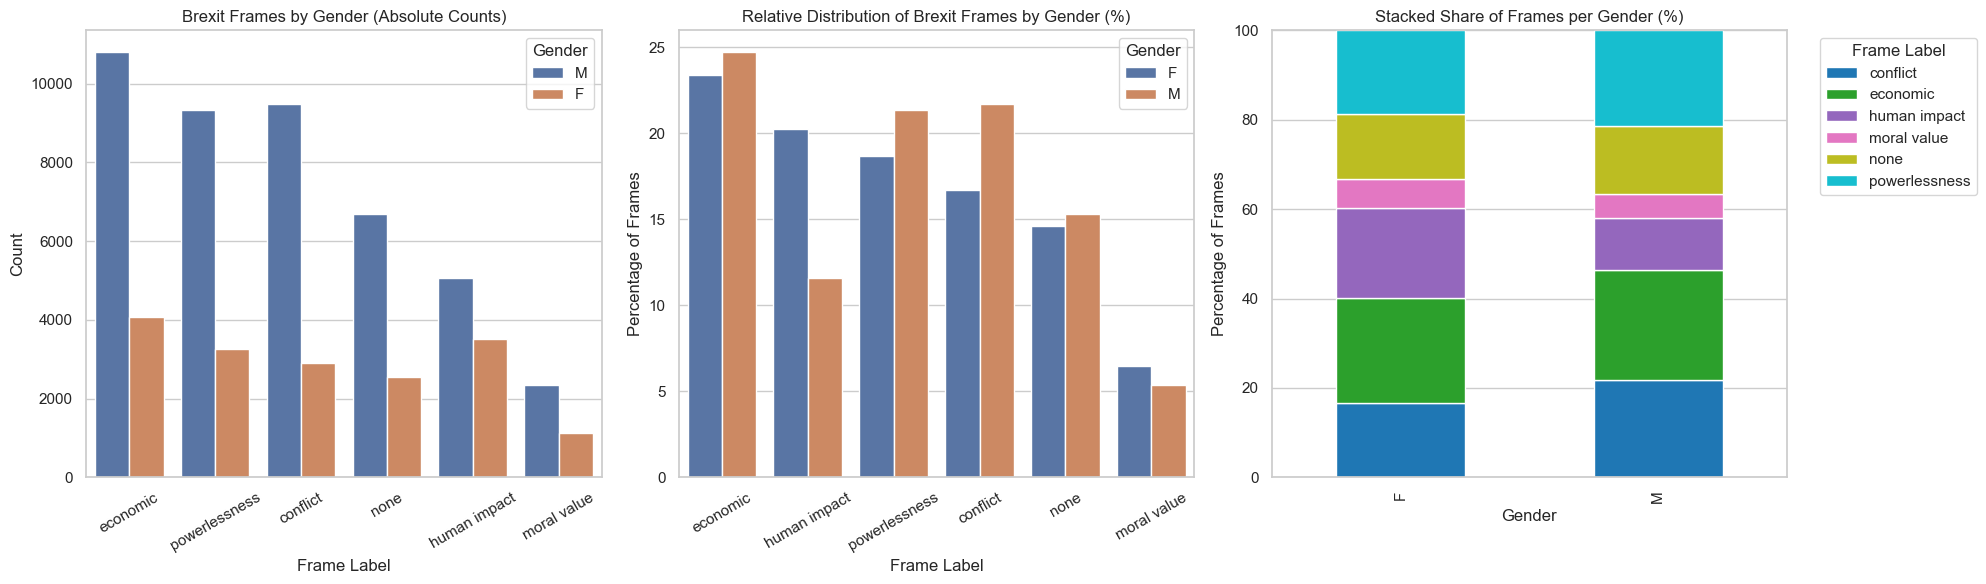

In [441]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ Prozentuale Verteilung vorbereiten
frame_gender_pct = (
    df_final
    .groupby('Gender')['frame_label']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percentage')
    .reset_index()
)

# 2️⃣ Gestapeltes Balkendiagramm vorbereiten
stacked_df = (
    df_final
    .groupby(['Gender', 'frame_label'])
    .size()
    .unstack(fill_value=0)
)

# In Prozent umrechnen, damit die Balken 100% ergeben
stacked_pct = stacked_df.div(stacked_df.sum(axis=1), axis=0) * 100

# 3️⃣ Subplots anlegen – drei Diagramme nebeneinander
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)

# --- Plot 1: Absolute Anzahl ---
sns.countplot(
    data=df_final,
    x='frame_label',
    hue='Gender',
    order=df_final['frame_label'].value_counts().index,
    ax=axes[0]
)
axes[0].set_title('Brexit Frames by Gender (Absolute Counts)')
axes[0].set_xlabel('Frame Label')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=30)
axes[0].legend(title='Gender')

# --- Plot 2: Prozentuale Verteilung pro Frame ---
sns.barplot(
    data=frame_gender_pct,
    x='frame_label',
    y='percentage',
    hue='Gender',
    ax=axes[1]
)
axes[1].set_title('Relative Distribution of Brexit Frames by Gender (%)')
axes[1].set_xlabel('Frame Label')
axes[1].set_ylabel('Percentage of Frames')
axes[1].tick_params(axis='x', rotation=30)
axes[1].legend(title='Gender')

# --- Plot 3: Gestapeltes Balkendiagramm ---
stacked_pct.plot(
    kind='bar',
    stacked=True,
    colormap='tab10',
    ax=axes[2]
)
axes[2].set_title('Stacked Share of Frames per Gender (%)')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Percentage of Frames')
axes[2].legend(title='Frame Label', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].set_ylim(0, 100)

plt.tight_layout()
plt.show()


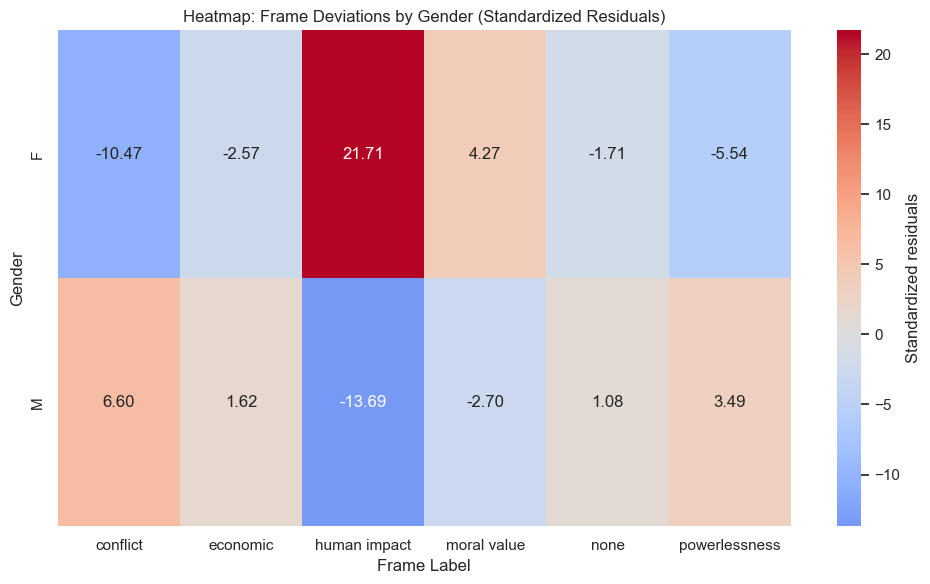

In [442]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. Build contingency table
cont_table = pd.crosstab(df_final['Gender'], df_final['frame_label'])

# 2. Chi-square test
chi2, p, dof, expected = chi2_contingency(cont_table)

# 3. Compute standardized residuals
std_residuals = (cont_table - expected) / np.sqrt(expected)

# 4. Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    std_residuals,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    cbar_kws={'label': 'Standardized residuals'}
)

plt.title("Heatmap: Frame Deviations by Gender (Standardized Residuals)")
plt.xlabel("Frame Label")
plt.ylabel("Gender")
plt.tight_layout()
plt.show()


In [443]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import math

# 1. Build contingency table
cont_table = pd.crosstab(df_final['Gender'], df_final['frame_label'])

# 2. Chi-square test
chi2, p, dof, expected = chi2_contingency(cont_table)

# 3. Compute Cramér’s V
n = cont_table.sum().sum()
k = min(cont_table.shape) - 1
cramers_v = math.sqrt(chi2 / (n * k))


# ---------------- OUTPUT ---------------- #
print("=== Chi-Square Test: Gender × Frame ===")
print(f"Chi² statistic: {chi2:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.6f}")
print(f"Cramér's V: {cramers_v:.3f}\n")



=== Chi-Square Test: Gender × Frame ===
Chi² statistic: 893.676
Degrees of freedom: 5
P-value: 0.000000
Cramér's V: 0.121



# Age Analysis 

In [444]:
import pandas as pd

df_age = df_final.copy()
df_age = df_age.dropna(subset=['age_at_speech', 'Gender'])

# --- Overall descriptive statistics ---
overall_age_stats = df_age['age_at_speech'].describe()

print("=== Overall Age at Speech: Descriptive Statistics ===")
print(overall_age_stats)

# Additional custom measures
overall_custom = {
    "median": df_age['age_at_speech'].median(),
    "variance": df_age['age_at_speech'].var(),
    "std_dev": df_age['age_at_speech'].std(),
    "iqr": df_age['age_at_speech'].quantile(0.75) - df_age['age_at_speech'].quantile(0.25),
    "min": df_age['age_at_speech'].min(),
    "max": df_age['age_at_speech'].max()
}
print("\n=== Overall Additional Measures ===")
print(overall_custom)

# --- Descriptive statistics by gender ---
gender_age_stats = df_age.groupby('Gender')['age_at_speech'].describe()

print("\n=== Age at Speech by Gender: Descriptive Statistics ===")
print(gender_age_stats)

# Additional per-gender custom measures
gender_custom = df_age.groupby('Gender').agg(
    median_age=('age_at_speech', 'median'),
    variance_age=('age_at_speech', 'var'),
    std_dev_age=('age_at_speech', 'std'),
    iqr_age=('age_at_speech', lambda x: x.quantile(0.75) - x.quantile(0.25)),
    min_age=('age_at_speech', 'min'),
    max_age=('age_at_speech', 'max'),
    count_speeches=('age_at_speech', 'count')
)

print("\n=== Age at Speech by Gender: Additional Measures ===")
print(gender_custom)


=== Overall Age at Speech: Descriptive Statistics ===
count      61082.0
mean     53.469467
std       10.59571
min           23.0
25%           46.0
50%           54.0
75%           61.0
max           85.0
Name: age_at_speech, dtype: Float64

=== Overall Additional Measures ===
{'median': 54.0, 'variance': 112.26907805152305, 'std_dev': 10.595710360873548, 'iqr': 15.0, 'min': 23, 'max': 85}

=== Age at Speech by Gender: Descriptive Statistics ===
          count       mean        std   min   25%   50%   75%   max
Gender                                                             
F       17388.0  52.102484   9.483642  23.0  45.0  53.0  60.0  83.0
M       43694.0  54.013457  10.959828  24.0  46.0  55.0  62.0  85.0

=== Age at Speech by Gender: Additional Measures ===
        median_age  variance_age  std_dev_age  iqr_age  min_age  max_age  \
Gender                                                                     
F             53.0     89.939459     9.483642       15       23       8

/var/folders/0c/59ptwnc93nscv24nvlwjhn2h0000gn/T/ipykernel_28943/1799838777.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



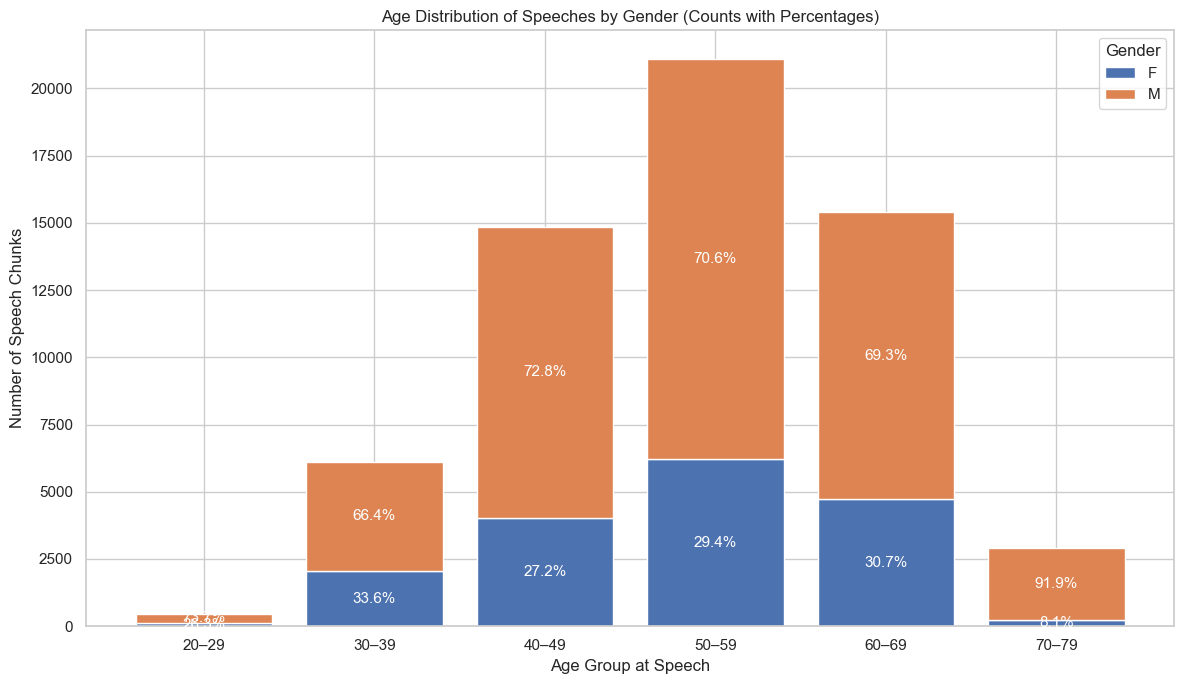

In [445]:
# --- Prep dataframe ---
df_age = df_final.copy()
df_age = df_age.dropna(subset=['age_at_speech', 'Gender'])

# Define age bins and labels
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20–29', '30–39', '40–49', '50–59', '60–69', '70–79']

df_age['age_group'] = pd.cut(df_age['age_at_speech'], bins=bins, labels=labels, right=False)
df_age = df_age.dropna(subset=['age_group'])

# --- Prepare data ---
age_gender_counts = (
    df_age
    .groupby(['age_group', 'Gender'])
    .size()
    .unstack(fill_value=0)
    .loc[labels]
)

# Percentages
age_gender_pct = age_gender_counts.div(age_gender_counts.sum(axis=1), axis=0) * 100

# --- Plot ---
plt.figure(figsize=(12,7))

bottom_vals = age_gender_counts['F']  # used for positioning M bars

# Stacked bars
plt.bar(age_gender_counts.index, age_gender_counts['F'], label='F', color="#4C72B0")
plt.bar(age_gender_counts.index, age_gender_counts['M'], bottom=age_gender_counts['F'], label='M', color="#DD8452")

plt.title("Age Distribution of Speeches by Gender (Counts with Percentages)")
plt.xlabel("Age Group at Speech")
plt.ylabel("Number of Speech Chunks")
plt.legend(title="Gender")

# --- Add percentages on bars ---
for i, age_group in enumerate(age_gender_counts.index):
    # Female %
    f_pct = age_gender_pct.loc[age_group, 'F']
    f_height = age_gender_counts.loc[age_group, 'F']
    if f_height > 0:
        plt.text(
            i, 
            f_height / 2,   # center of F bar
            f"{f_pct:.1f}%", 
            ha='center', va='center', color='white', fontsize=11
        )
    
    # Male %
    m_pct = age_gender_pct.loc[age_group, 'M']
    m_height = age_gender_counts.loc[age_group, 'M']
    if m_height > 0:
        plt.text(
            i,
            age_gender_counts.loc[age_group, 'F'] + m_height / 2,  # center of M bar
            f"{m_pct:.1f}%",
            ha='center', va='center', color='white', fontsize=11
        )

plt.tight_layout()
plt.show()


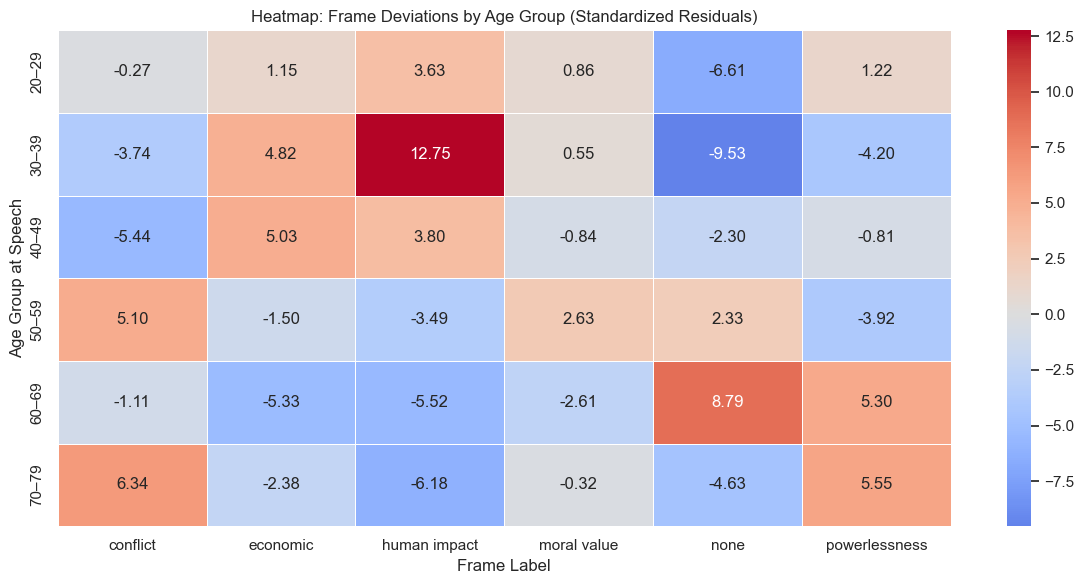

=== Chi-Square Test: Age Group × Frame ===
Chi²: 821.749
p-value: 0.000000
Degrees of freedom: 25


In [448]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# -----------------------------------
# 1. Prepare age groups
# -----------------------------------
df_ageframe = df_final.dropna(subset=['age_at_speech', 'frame_label']).copy()

age_bins = [20, 30, 40, 50, 60, 70, 100]
age_labels = ["20–29", "30–39", "40–49", "50–59", "60–69", "70–79"]

df_ageframe['age_group'] = pd.cut(
    df_ageframe['age_at_speech'],
    bins=age_bins,
    labels=age_labels,
    right=False
)

# remove NaN age groups (if any)
df_ageframe = df_ageframe.dropna(subset=['age_group'])

# -----------------------------------
# 2. Build contingency table
# -----------------------------------
contingency = pd.crosstab(df_ageframe['age_group'], df_ageframe['frame_label'])

# -----------------------------------
# 3. Chi-square test
# -----------------------------------
chi2, p, dof, expected = chi2_contingency(contingency)

# -----------------------------------
# 4. Standardized residuals
# -----------------------------------
std_residuals = (contingency - expected) / np.sqrt(expected)

# -----------------------------------
# 5. Plot heatmap
# -----------------------------------
plt.figure(figsize=(12, 6))
sns.heatmap(
    std_residuals,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    linewidths=0.5
)

plt.title("Heatmap: Frame Deviations by Age Group (Standardized Residuals)")
plt.xlabel("Frame Label")
plt.ylabel("Age Group at Speech")
plt.tight_layout()
plt.show()

# Optionally print test result
print("=== Chi-Square Test: Age Group × Frame ===")
print(f"Chi²: {chi2:.3f}")
print(f"p-value: {p:.6f}")
print(f"Degrees of freedom: {dof}")


# Parliamentary Tenure Analysis

In [449]:
import pandas as pd
import numpy as np

# --- Overall Descriptive Statistics ---
print("\n=== Overall Parliamentary Tenure at Speech: Descriptive Statistics ===")
print(df_final['years_in_house_at_speech'].describe())

# Additional summary metrics
additional_stats = {
    'median': df_final['years_in_house_at_speech'].median(),
    'variance': df_final['years_in_house_at_speech'].var(),
    'std_dev': df_final['years_in_house_at_speech'].std(),
    'iqr': df_final['years_in_house_at_speech'].quantile(0.75) - df_final['years_in_house_at_speech'].quantile(0.25),
    'min': df_final['years_in_house_at_speech'].min(),
    'max': df_final['years_in_house_at_speech'].max()
}

print("\n=== Overall Additional Measures ===")
print(additional_stats)



=== Overall Parliamentary Tenure at Speech: Descriptive Statistics ===
count     59781.0
mean     11.52316
std      9.578317
min           0.0
25%           4.0
50%           9.0
75%          18.0
max          55.0
Name: years_in_house_at_speech, dtype: Float64

=== Overall Additional Measures ===
{'median': 9.0, 'variance': 91.74414830424139, 'std_dev': 9.578316569431259, 'iqr': 14, 'min': 0, 'max': 55}


In [450]:
print("\n=== Parliamentary Tenure by Gender: Descriptive Statistics ===")
print(df_final.groupby('Gender')['years_in_house_at_speech'].describe())

# Additional measures per gender
gender_stats = df_final.groupby('Gender')['years_in_house_at_speech'].agg(
    median_tenure='median',
    variance_tenure='var',
    std_dev_tenure='std',
    iqr_tenure=lambda x: x.quantile(0.75) - x.quantile(0.25),
    min_tenure='min',
    max_tenure='max',
    count_speeches='count'
)

print("\n=== Parliamentary Tenure by Gender: Additional Measures ===")
print(gender_stats)



=== Parliamentary Tenure by Gender: Descriptive Statistics ===
          count       mean        std  min  25%  50%   75%   max
Gender                                                          
F       16790.0   9.409589   7.792603  0.0  3.0  7.0  14.0  46.0
M       42991.0  12.348608  10.071462  0.0  4.0  9.0  18.0  55.0

=== Parliamentary Tenure by Gender: Additional Measures ===
        median_tenure  variance_tenure  std_dev_tenure  iqr_tenure  \
Gender                                                               
F                 7.0        60.724656        7.792603          11   
M                 9.0       101.434343       10.071462          14   

        min_tenure  max_tenure  count_speeches  
Gender                                          
F                0          46           16790  
M                0          55           42991  


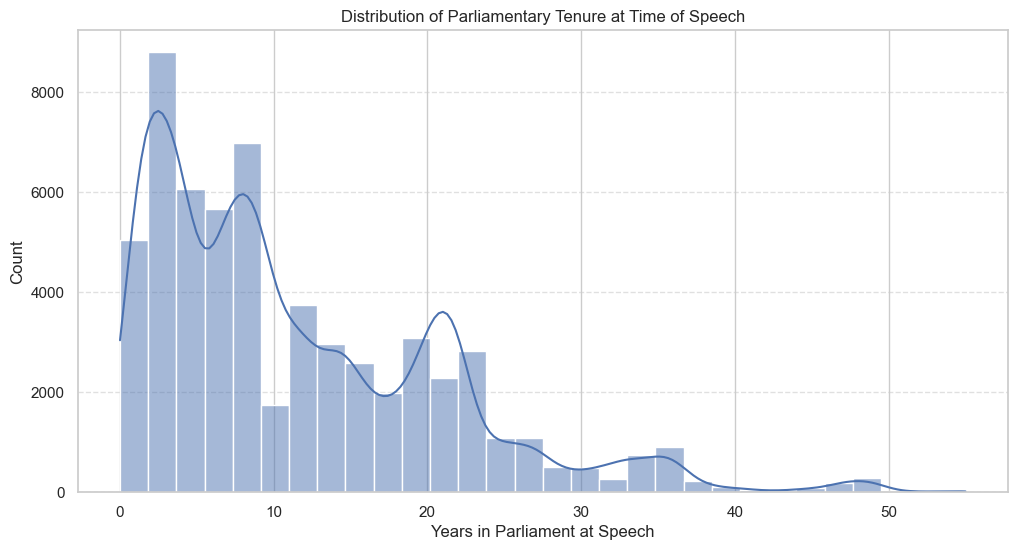

In [451]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.histplot(df_final['years_in_house_at_speech'], bins=30, kde=True)
plt.title("Distribution of Parliamentary Tenure at Time of Speech")
plt.xlabel("Years in Parliament at Speech")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


/var/folders/0c/59ptwnc93nscv24nvlwjhn2h0000gn/T/ipykernel_28943/3124266799.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1200x700 with 0 Axes>

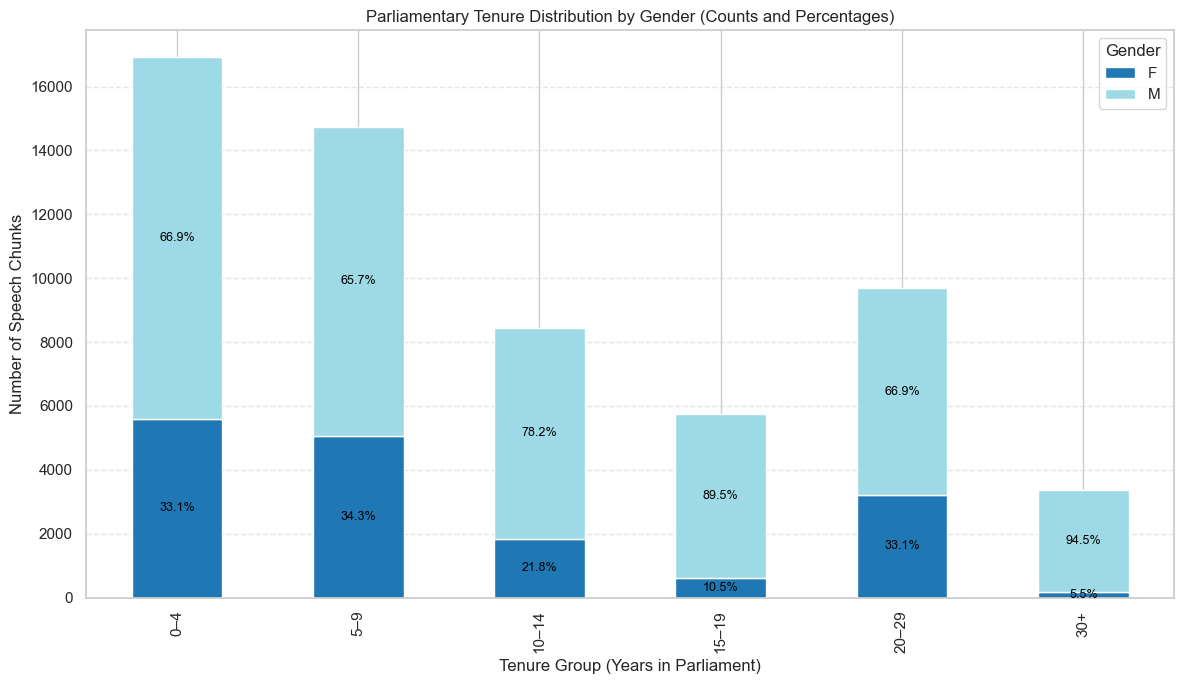

In [453]:
bins = [0, 4, 9, 14, 19, 29, 100]
labels = ["0–4", "5–9", "10–14", "15–19", "20–29", "30+"]

df_final['tenure_group'] = pd.cut(df_final['years_in_house_at_speech'], bins=bins, labels=labels, right=True)

# Group data
tenure_gender = df_final.groupby(['tenure_group', 'Gender']).size().unstack(fill_value=0)

# Percentages
tenure_gender_pct = tenure_gender.div(tenure_gender.sum(axis=1), axis=0) * 100

# Plot
plt.figure(figsize=(12,7))
tenure_gender.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')

plt.title("Parliamentary Tenure Distribution by Gender (Counts and Percentages)")
plt.xlabel("Tenure Group (Years in Parliament)")
plt.ylabel("Number of Speech Chunks")
plt.legend(title="Gender")

# Add percentages
for i, row in enumerate(tenure_gender_pct.values):
    cumulative = 0
    for j, pct in enumerate(row):
        cumulative += tenure_gender.iloc[i, j]
        plt.text(i, cumulative - tenure_gender.iloc[i, j] / 2,
                 f"{pct:.1f}%", ha="center", va="center", fontsize=9, color="black")

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [454]:
# Contingency table: Tenure Group × Frame Label
ct_tenure_frame = pd.crosstab(df_final['tenure_group'], df_final['frame_label'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(ct_tenure_frame)

print("\n=== Chi-Square Test: Tenure Group × Frame ===")
print(f"Chi² statistic: {chi2:.3f}")
print(f"P-value: {p:.6f}")
print(f"Degrees of freedom: {dof}")

# Cramér's V
n = ct_tenure_frame.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(ct_tenure_frame.shape) - 1)))
print(f"Cramér's V: {cramers_v:.3f}")



=== Chi-Square Test: Tenure Group × Frame ===
Chi² statistic: 2161.241
P-value: 0.000000
Degrees of freedom: 25
Cramér's V: 0.086


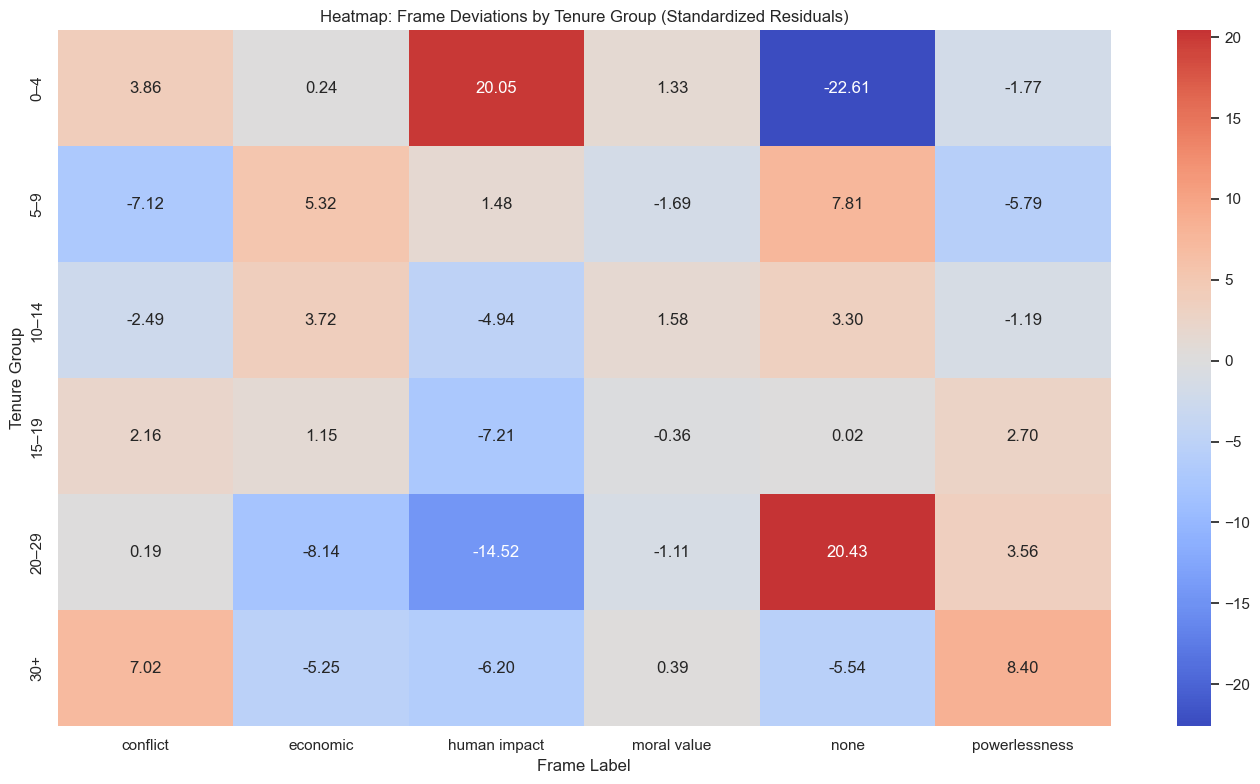

In [455]:
# Convert expected frequencies into DataFrame for easier work
expected_df = pd.DataFrame(expected, 
                           index=ct_tenure_frame.index, 
                           columns=ct_tenure_frame.columns)

# Compute standardized residuals
std_residuals = (ct_tenure_frame - expected_df) / np.sqrt(expected_df)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.heatmap(std_residuals, annot=True, fmt=".2f", cmap="coolwarm", center=0)

plt.title("Heatmap: Frame Deviations by Tenure Group (Standardized Residuals)")
plt.xlabel("Frame Label")
plt.ylabel("Tenure Group")
plt.tight_layout()
plt.show()


# Age and Parliamentary Tenure Analysis

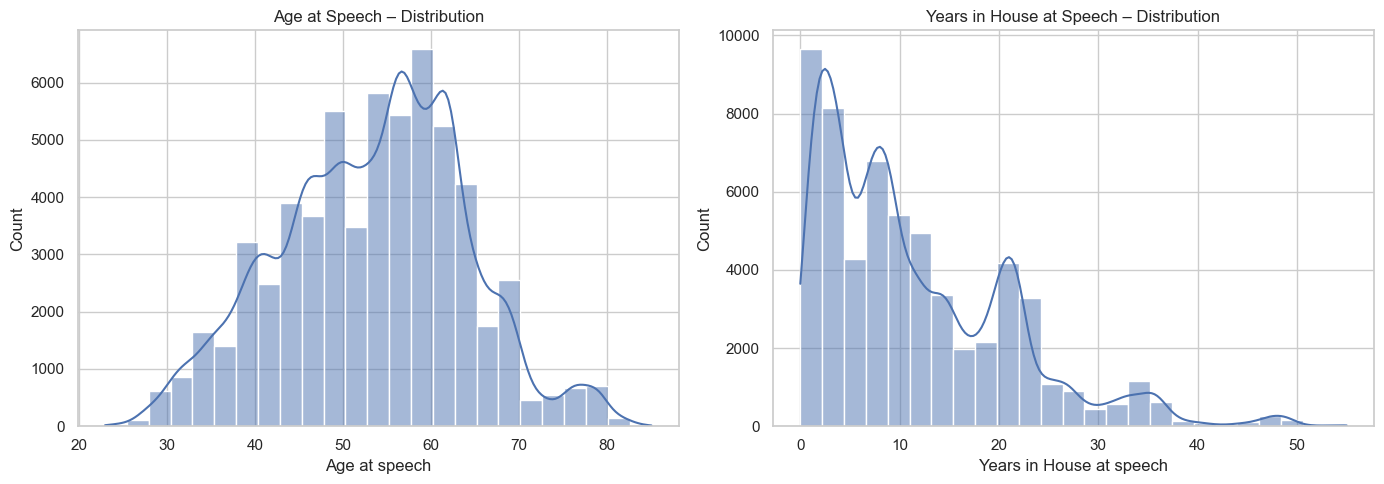

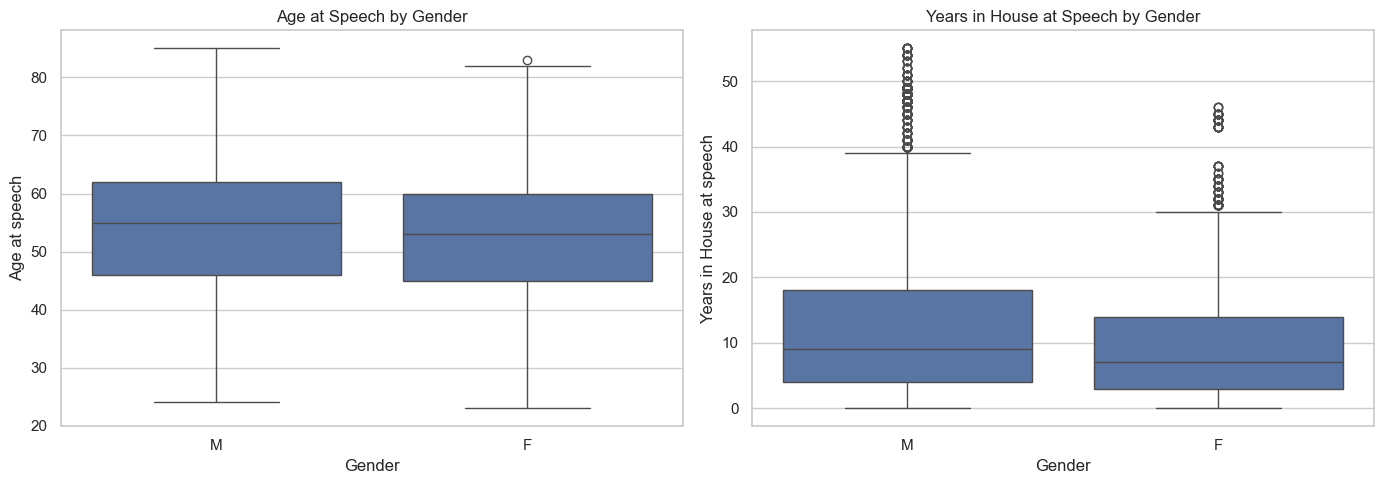

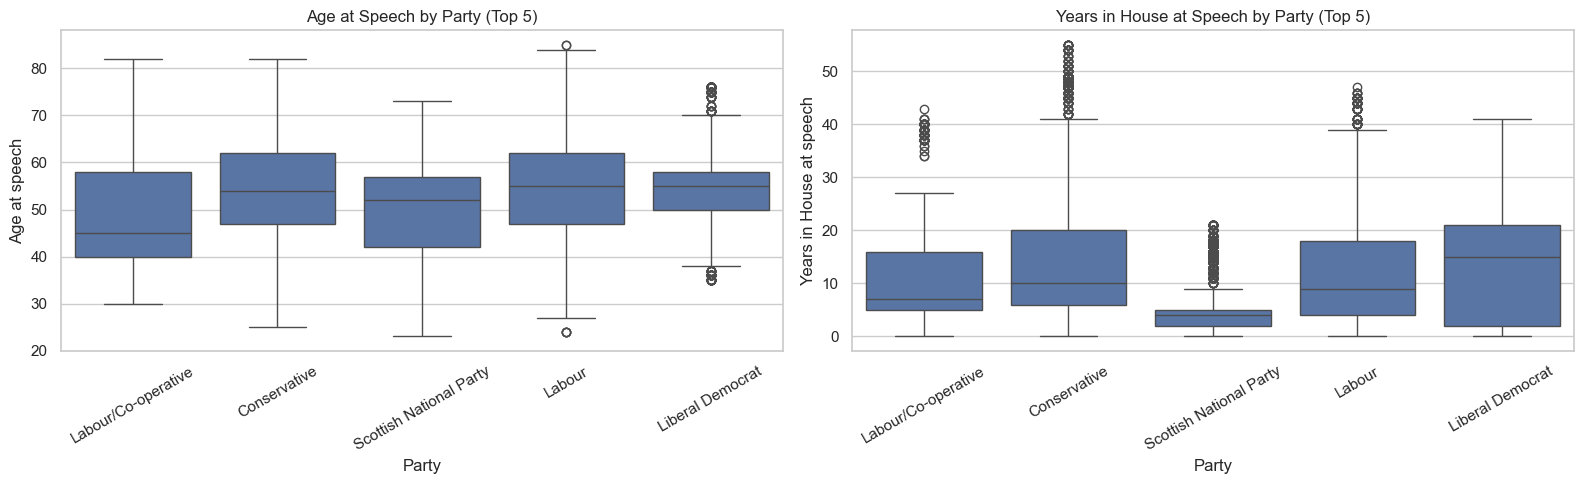

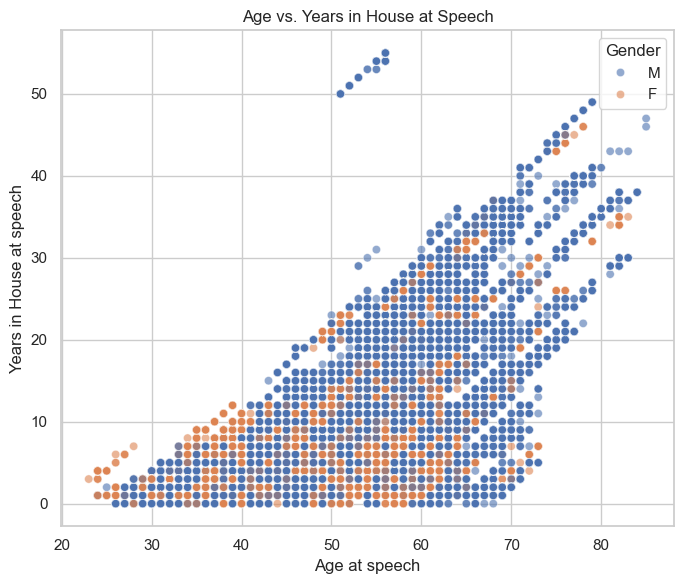

In [446]:
import seaborn as sns
import matplotlib.pyplot as plt

# Stil
sns.set(style="whitegrid")

# ============================
# 1) Grundverteilung: Alter & Years in House
# ============================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Alter
sns.histplot(
    data=df_final,
    x='age_at_speech',
    bins=25,
    kde=True,
    ax=axes[0]
)
axes[0].set_title('Age at Speech – Distribution')
axes[0].set_xlabel('Age at speech')
axes[0].set_ylabel('Count')

# Years in House
sns.histplot(
    data=df_final,
    x='years_in_house_at_speech',
    bins=25,
    kde=True,
    ax=axes[1]
)
axes[1].set_title('Years in House at Speech – Distribution')
axes[1].set_xlabel('Years in House at speech')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# ============================
# 2) Alter & Years in House nach Geschlecht
# ============================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(
    data=df_final,
    x='Gender',
    y='age_at_speech',
    ax=axes[0]
)
axes[0].set_title('Age at Speech by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Age at speech')

sns.boxplot(
    data=df_final,
    x='Gender',
    y='years_in_house_at_speech',
    ax=axes[1]
)
axes[1].set_title('Years in House at Speech by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Years in House at speech')

plt.tight_layout()
plt.show()

# ============================
# 3) Alter & Years in House nach Partei (Top-Parteien)
# ============================

# nur häufigere Parteien (optional)
top_parties = df_final['Party'].value_counts().head(5).index
df_parties = df_final[df_final['Party'].isin(top_parties)]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.boxplot(
    data=df_parties,
    x='Party',
    y='age_at_speech',
    ax=axes[0]
)
axes[0].set_title('Age at Speech by Party (Top 5)')
axes[0].set_xlabel('Party')
axes[0].set_ylabel('Age at speech')
axes[0].tick_params(axis='x', rotation=30)

sns.boxplot(
    data=df_parties,
    x='Party',
    y='years_in_house_at_speech',
    ax=axes[1]
)
axes[1].set_title('Years in House at Speech by Party (Top 5)')
axes[1].set_xlabel('Party')
axes[1].set_ylabel('Years in House at speech')
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

# ============================
# 4) Beziehung zwischen Alter & Years in House
# ============================

plt.figure(figsize=(7,6))
sns.scatterplot(
    data=df_final,
    x='age_at_speech',
    y='years_in_house_at_speech',
    hue='Gender',
    alpha=0.6
)
plt.title('Age vs. Years in House at Speech')
plt.xlabel('Age at speech')
plt.ylabel('Years in House at speech')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


/var/folders/0c/59ptwnc93nscv24nvlwjhn2h0000gn/T/ipykernel_28943/1883272268.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




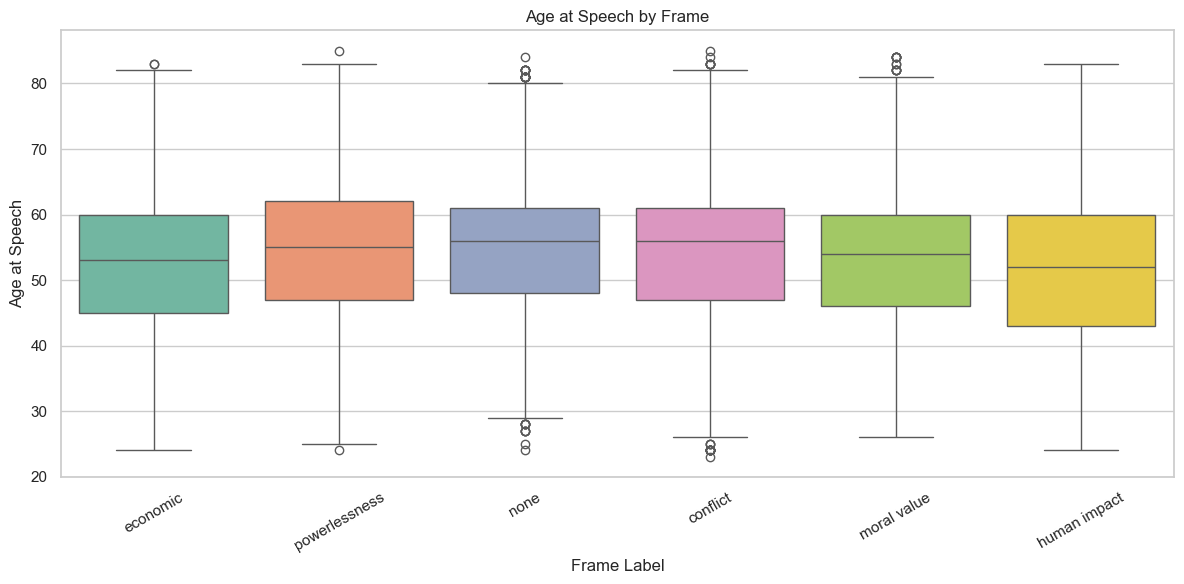

/var/folders/0c/59ptwnc93nscv24nvlwjhn2h0000gn/T/ipykernel_28943/1883272268.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




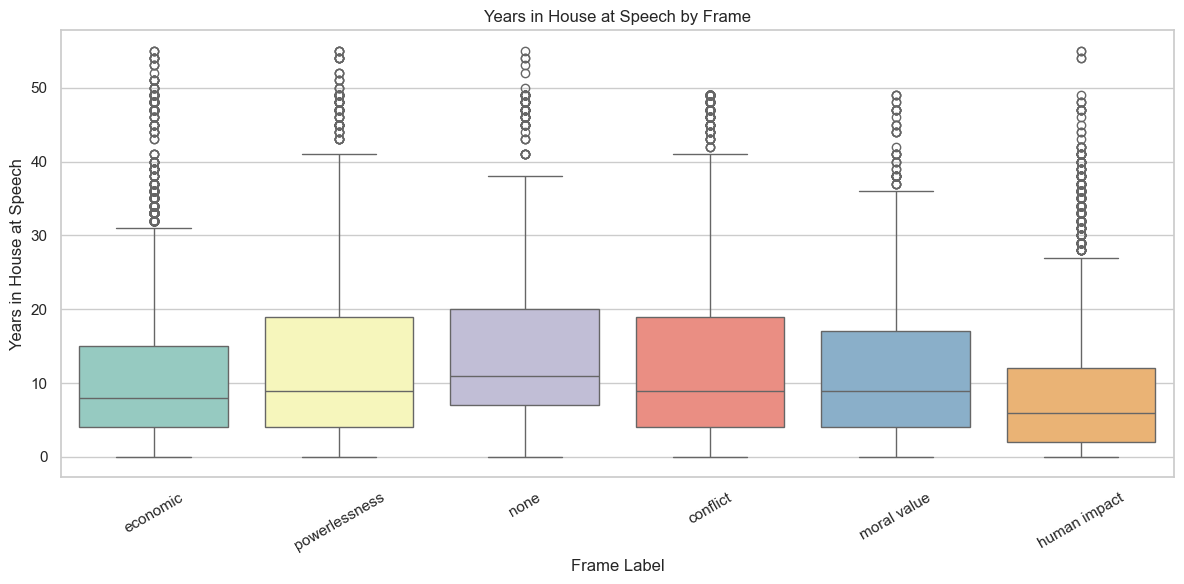

/var/folders/0c/59ptwnc93nscv24nvlwjhn2h0000gn/T/ipykernel_28943/1883272268.py:52: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/0c/59ptwnc93nscv24nvlwjhn2h0000gn/T/ipykernel_28943/1883272268.py:64: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




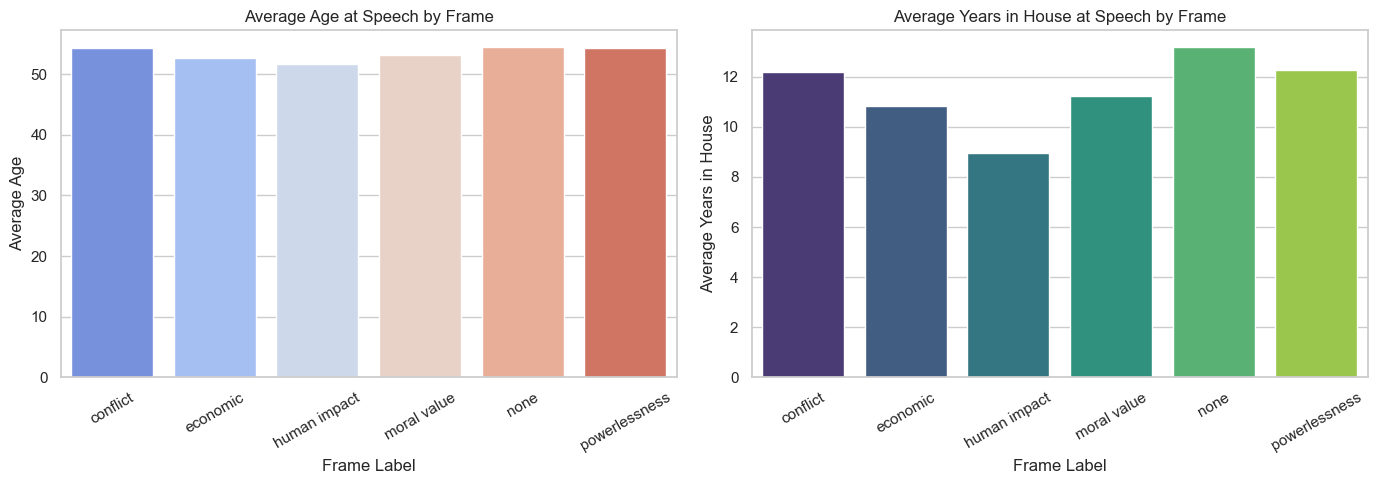

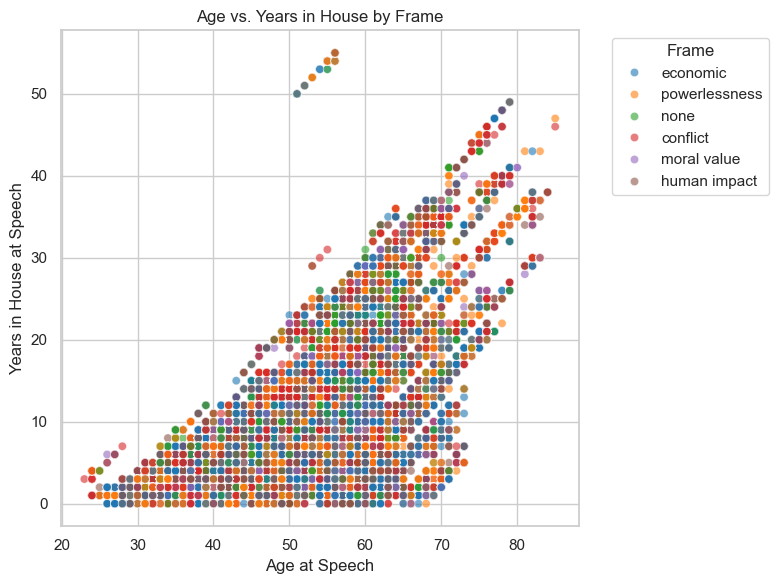

In [447]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# ============================
# 1️⃣ Altersverteilung pro Frame
# ============================
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_final,
    x='frame_label',
    y='age_at_speech',
    palette='Set2'
)
plt.title('Age at Speech by Frame')
plt.xlabel('Frame Label')
plt.ylabel('Age at Speech')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# ============================
# 2️⃣ Erfahrung (Years in House) pro Frame
# ============================
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_final,
    x='frame_label',
    y='years_in_house_at_speech',
    palette='Set3'
)
plt.title('Years in House at Speech by Frame')
plt.xlabel('Frame Label')
plt.ylabel('Years in House at Speech')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# ============================
# 3️⃣ Durchschnittsalter & Erfahrung pro Frame (Barplots)
# ============================
frame_summary = (
    df_final
    .groupby('frame_label')[['age_at_speech', 'years_in_house_at_speech']]
    .mean()
    .reset_index()
)

fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.barplot(
    data=frame_summary,
    x='frame_label',
    y='age_at_speech',
    palette='coolwarm',
    ax=axes[0]
)
axes[0].set_title('Average Age at Speech by Frame')
axes[0].set_xlabel('Frame Label')
axes[0].set_ylabel('Average Age')
axes[0].tick_params(axis='x', rotation=30)

sns.barplot(
    data=frame_summary,
    x='frame_label',
    y='years_in_house_at_speech',
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title('Average Years in House at Speech by Frame')
axes[1].set_xlabel('Frame Label')
axes[1].set_ylabel('Average Years in House')
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

# ============================
# 4️⃣ Scatterplot: Alter vs. Erfahrung, farblich nach Frame
# ============================
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_final,
    x='age_at_speech',
    y='years_in_house_at_speech',
    hue='frame_label',
    alpha=0.6,
    palette='tab10'
)
plt.title('Age vs. Years in House by Frame')
plt.xlabel('Age at Speech')
plt.ylabel('Years in House at Speech')
plt.legend(title='Frame', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
